# Mahmoud Mourad Youssef
# Task 6 Sparks

# Importing libraries

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Reading Iris data

In [147]:
iris=datasets.load_iris()

data=pd.read_csv("iris.csv",index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [148]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [149]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Ploting Data

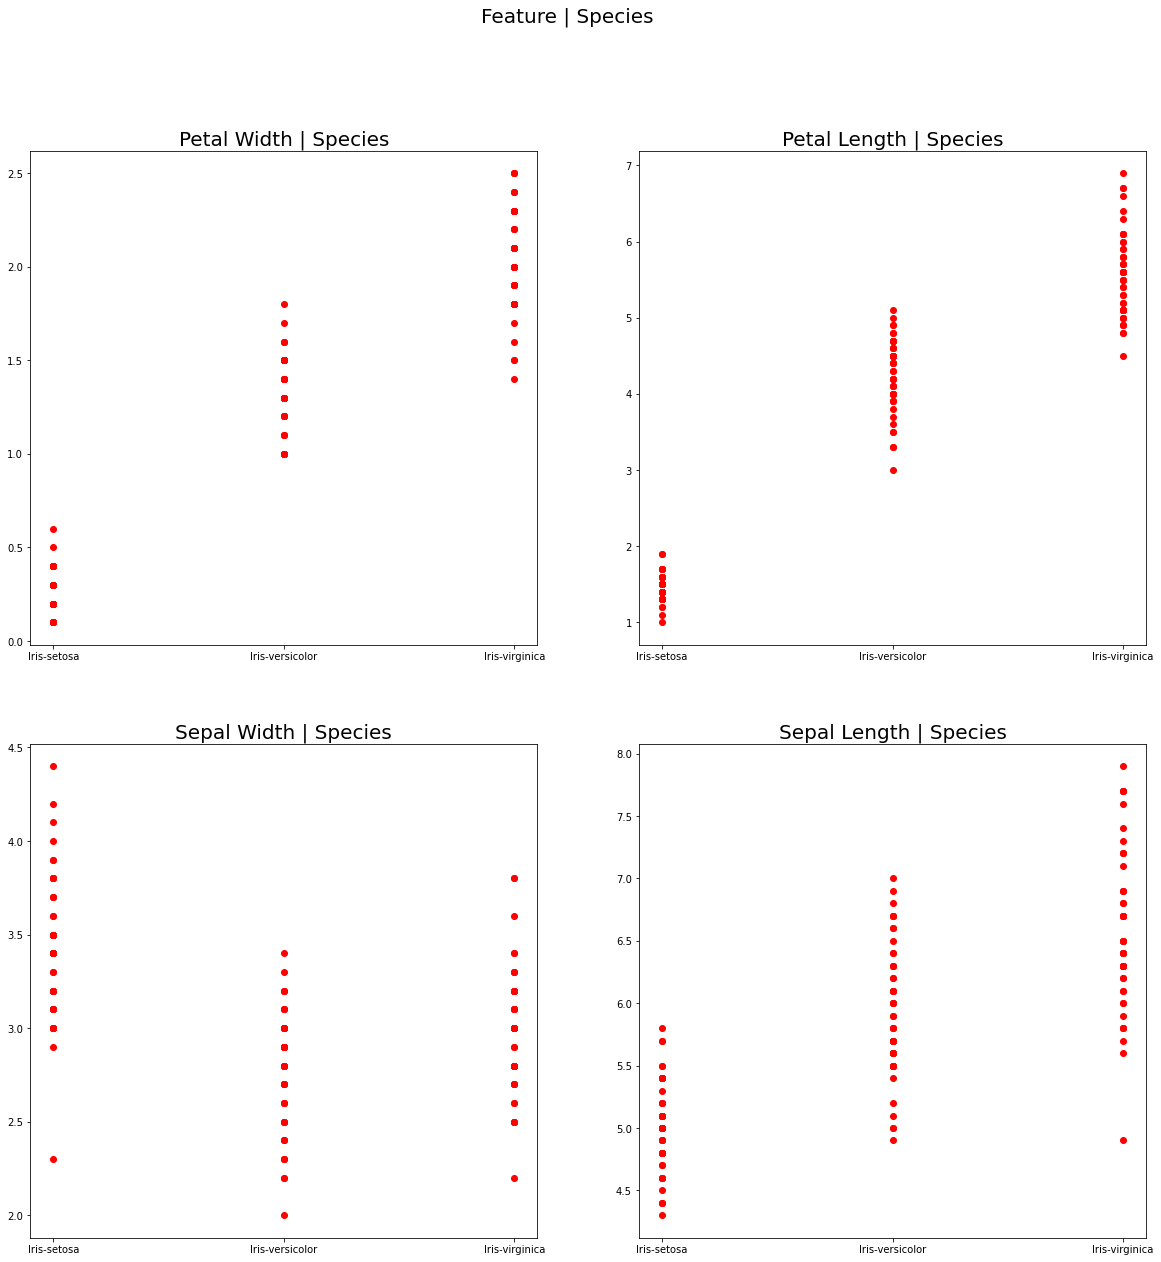

In [150]:
# plotting Data
# With features on y-axis and species on x-axis
fig, ax = plt.subplots(2, 2 ,figsize = (20 , 20) ) 
fig.suptitle('Feature | Species ',fontsize = 20)


ax[0, 0].scatter(data['Species'], data['PetalWidthCm'], color="red")
ax[0, 0].set_title('Petal Width | Species',fontsize = 20)


ax[0, 1].scatter(data['Species'], data['PetalLengthCm'], color="red")
ax[0, 1].set_title('Petal Length | Species',fontsize = 20)


ax[1, 0].scatter(data['Species'], data['SepalWidthCm'], color="red")
ax[1, 0].set_title('Sepal Width | Species',fontsize = 20)


ax[1, 1].scatter(data['Species'], data['SepalLengthCm'], color="red")
ax[1, 1].set_title('Sepal Length | Species',fontsize = 20)

plt.show()

# Splitting data

In [151]:
#features on x and labels on y
x=data.iloc[:,:-1].values
y=data['Species']
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
print(x_train.shape,x_test.shape)

(120, 4) (30, 4)


# Building the tree and Cross Validation

In [152]:
#performing cross validation
maxdepth_List = list(range(1,11))
score = []
for m in maxdepth_List:
    classifier = DecisionTreeClassifier(criterion="entropy",max_depth=m,random_state=3)
    scores = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    score.append(scores.mean())
print(score)
best = maxdepth_List[score_tree.index(max(score))]
print('\nthe best number of levels is %d.' % best)

[0.6666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]

the best number of levels is 4.


In [153]:
#building the decision tree
classifier=DecisionTreeClassifier(criterion="entropy",max_depth=best,random_state=3)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=3)

# Graph Representation

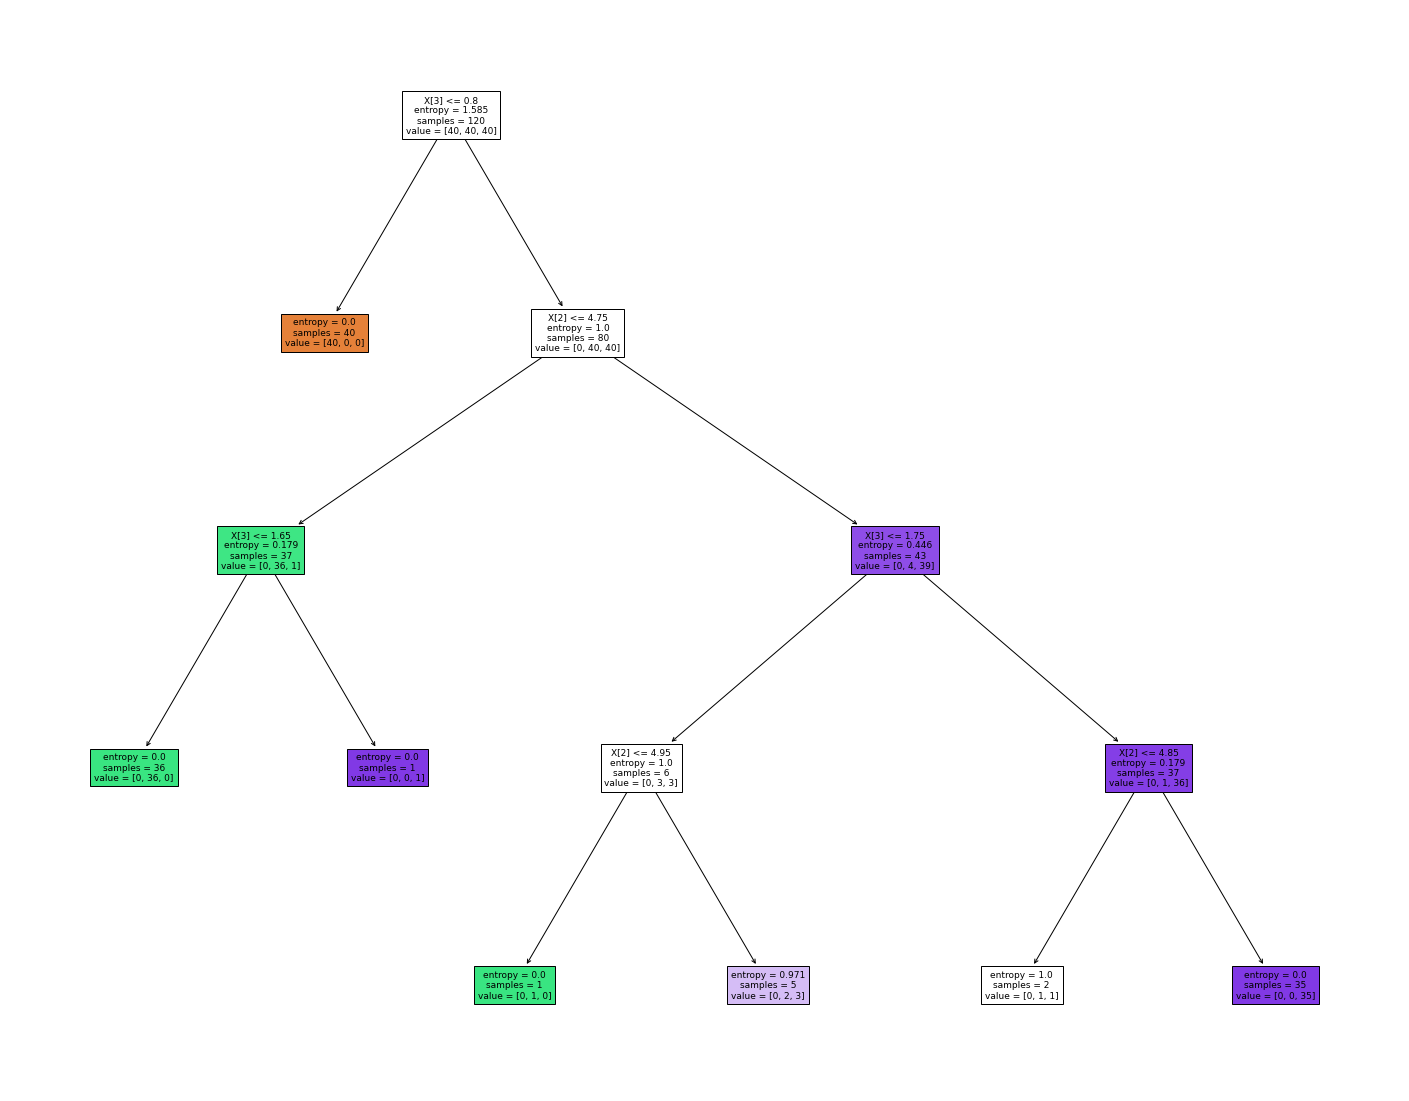

In [154]:
features=['SepalLengthCM','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-Setosa','Iris-versicolor','Iris-virginca']
from sklearn import tree
#decision tree graph
fig = plt.figure(figsize=(25,20))
graph = tree.plot_tree(classifier, max_depth = 5,fontsize=9,
                   filled=True)
fig.savefig("decistion_tree.png")

# Evaluating the data model

In [155]:
y_pred=classifier.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy_tree)

Accuracy: 0.97


In [156]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [157]:
from sklearn.metrics import precision_score
#precision=tp/(tp+fp)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
#recall=tp/(tp+fn)
recall = recall_score(y_test, y_pred,average='micro')
print('Recall:%.3f'%recall)
from sklearn.metrics import f1_score
#score=(2*precision*recall)/(precision+recall)
score = f1_score(y_test, y_pred,average='micro')
print('Score:%.3f'%score)

Precision: 0.967
Recall:0.967
Score:0.967
